In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('/content/QVI_data (1).csv')
data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
data.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
# new column which have month name take from  DATE column just code generate short

data['Month'] = pd.to_datetime(data['DATE']).dt.month_name()
data.head(5)


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,October
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,September
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,March
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,March
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,November


In [8]:
#  add a new column its value multiply  TOT_SALE WITH  PROD_QTY GENERATE CODE SHORT and remove  TOT_SALE

data['TOTAL_SALE'] = data['TOT_SALES'] * data['PROD_QTY']
data.head(3)


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month,TOTAL_SALE
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,October,12.0
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,September,2.7
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,March,3.6


In [9]:
#  a subset of the data for the specified stores and months
store_data = data[(data['STORE_NBR'].isin([77, 86, 88])) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') >= pd.Period('2019-02')) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') <= pd.Period('2019-04'))]

# Calculate total sales for each store
total_sales = store_data.groupby('STORE_NBR')['TOTAL_SALE'].sum()

# Create the metrics table
metrics_table = pd.DataFrame({'STORE_NBR': total_sales.index, 'TOTAL_SALES': total_sales.values})

metrics_table


,STORE_NBR,TOTAL_SALES
0,77,1331.2
1,86,5572.6
2,88,8573.6


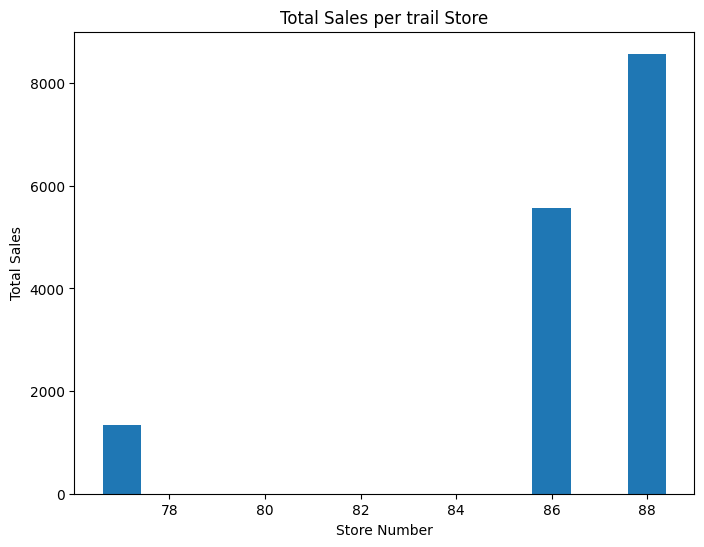

In [10]:
# Assuming 'metrics_table' DataFrame exists from previous code

plt.figure(figsize=(8, 6))
plt.bar(metrics_table['STORE_NBR'], metrics_table['TOTAL_SALES'])
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales per trail Store')
plt.show()


In [11]:

# Assuming 'data' DataFrame is already loaded as in the previous code

# Create a subset of the data for the specified stores and months
store_data = data[(data['STORE_NBR'].isin([77, 86, 88])) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') >= pd.Period('2019-02')) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') <= pd.Period('2019-04'))]

# Calculate the total number of transactions for each store
total_transactions = store_data.groupby('STORE_NBR')['TXN_ID'].count()

# Create the metrics table
metrics_table = pd.DataFrame({
    'STORE_NBR': total_transactions.index,
    'TOTAL_TRANSACTIONS': total_transactions.values
})

# Display the table
metrics_table


,STORE_NBR,TOTAL_TRANSACTIONS
0,77,148
1,86,408
2,88,486


In [12]:



# Create a subset of the data for the specified stores and months
store_data = data[(data['STORE_NBR'].isin([77, 86, 88])) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') >= pd.Period('2019-02')) &
                  (pd.to_datetime(data['DATE']).dt.to_period('M') <= pd.Period('2019-04'))]

# Group by store number and customer, then sum total sales
customer_sales = store_data.groupby(['STORE_NBR', 'PREMIUM_CUSTOMER'])['TOTAL_SALE'].sum().reset_index()

# Rename columns for clarity
customer_sales = customer_sales.rename(columns={'PREMIUM_CUSTOMER': 'Customer_Name', 'TOTAL_SALE': 'Total_Sales'})

# Display the resulting matrix
customer_sales


,STORE_NBR,Customer_Name,Total_Sales
0,77,Budget,479.7
1,77,Mainstream,480.8
2,77,Premium,370.7
3,86,Budget,2032.0
4,86,Mainstream,2169.0
5,86,Premium,1371.6
6,88,Budget,3033.6
7,88,Mainstream,2955.6
8,88,Premium,2584.4


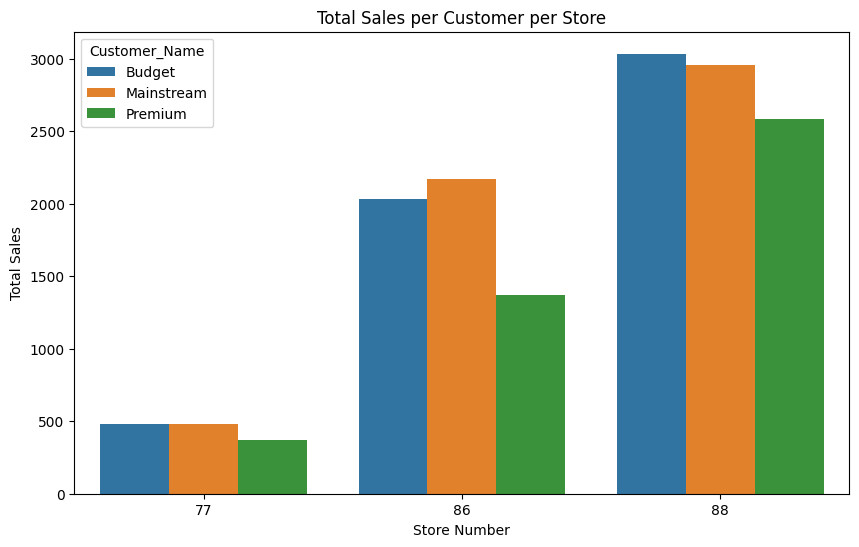

In [13]:


# Assuming 'customer_sales' DataFrame is already created as in the previous code

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='STORE_NBR', y='Total_Sales', hue='Customer_Name', data=customer_sales)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer per Store')
plt.show()


<ipython-input-14-481bcffdf735>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.groupby(['STORE_NBR', pd.Grouper(key='DATE', freq='M')])[['TOTAL_SALE', 'LYLTY_CARD_NBR']].agg({'TOTAL_SALE': 'sum', 'LYLTY_CARD_NBR': 'nunique'})


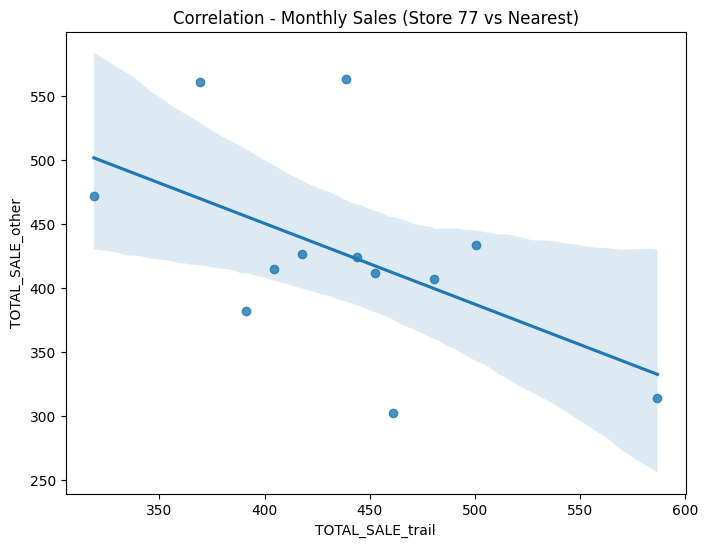

In [14]:

# Feature Engineering
data['Month'] = pd.to_datetime(data['DATE']).dt.month_name()
data['TOTAL_SALE'] = data['TOT_SALES'] * data['PROD_QTY']

# **Convert 'DATE' column to DatetimeIndex**
data['DATE'] = pd.to_datetime(data['DATE'])

# Define trail stores
trail_stores = [77, 86, 88]

# Filter data for trail stores and specified months
store_data = data[(data['STORE_NBR'].isin(trail_stores)) &
                  (data['DATE'].dt.to_period('M') >= pd.Period('2019-02')) &
                  (data['DATE'].dt.to_period('M') <= pd.Period('2019-04'))]

# Calculate total sales for each trail store
total_sales = store_data.groupby('STORE_NBR')['TOTAL_SALE'].sum()

# Find the store with total sales nearest to the average of the trail stores
avg_sales = total_sales.mean()
other_stores = data[~data['STORE_NBR'].isin(trail_stores)]['STORE_NBR'].unique()

# Calculate total sales for other stores
other_store_sales = data[data['STORE_NBR'].isin(other_stores)].groupby('STORE_NBR')['TOTAL_SALE'].sum()

# Find the nearest store based on total sales
nearest_store = other_store_sales.iloc[(other_store_sales - avg_sales).abs().argsort()[:1]].index[0]

# --- Calculate monthly sales and customer numbers ---
# Group by store number and month, then aggregate sales and customer count
monthly_data = data.groupby(['STORE_NBR', pd.Grouper(key='DATE', freq='M')])[['TOTAL_SALE', 'LYLTY_CARD_NBR']].agg({'TOTAL_SALE': 'sum', 'LYLTY_CARD_NBR': 'nunique'})
monthly_data = monthly_data.reset_index()

trail_monthly = monthly_data[monthly_data['STORE_NBR'].isin(trail_stores)]
nearest_monthly = monthly_data[monthly_data['STORE_NBR'] == nearest_store]

# Calculate Correlations (Example: Monthly Sales)
def correlation_plot(df1, df2, title):
    merged_data = pd.merge(df1, df2, on='DATE', suffixes=('_trail', '_other'))
    plt.figure(figsize=(8,6))
    sns.regplot(x='TOTAL_SALE_trail', y='TOTAL_SALE_other', data=merged_data)
    plt.title(title)
    plt.show()

correlation_plot(trail_monthly[trail_monthly['STORE_NBR'] == 77], nearest_monthly, 'Correlation - Monthly Sales (Store 77 vs Nearest)')

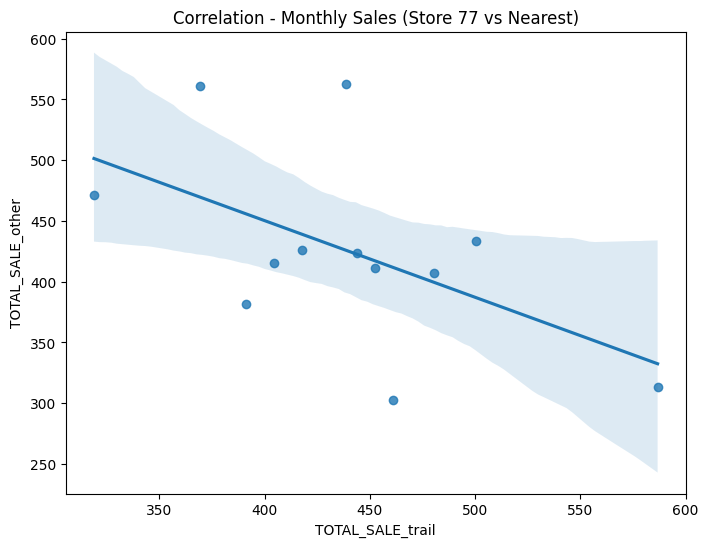

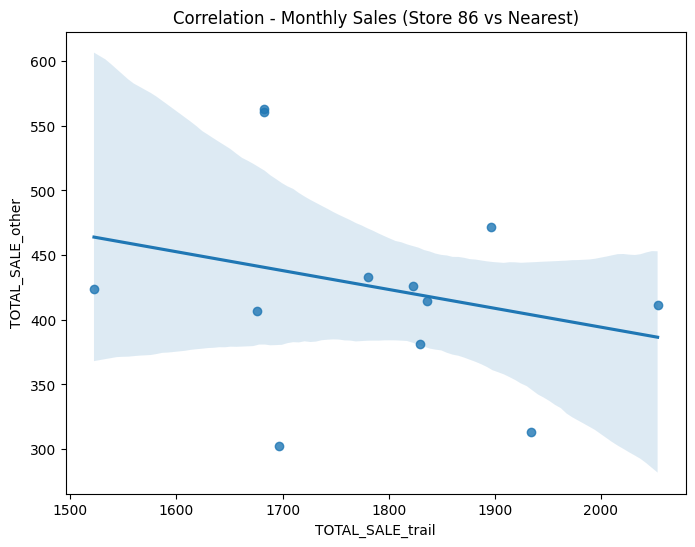

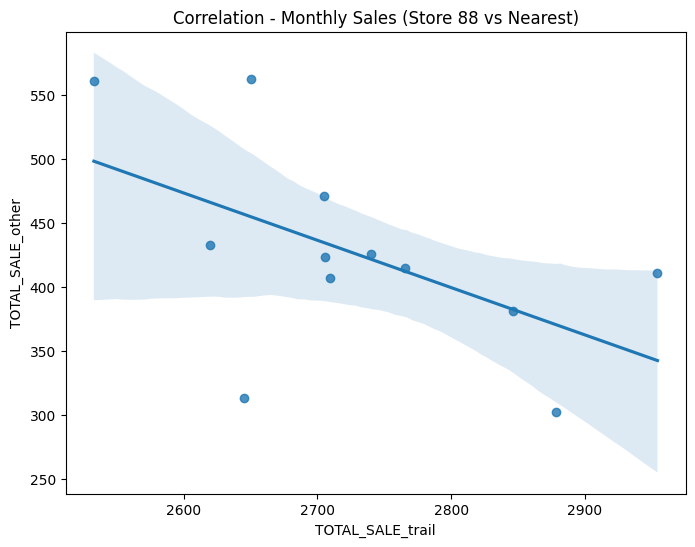

In [15]:


# Assuming 'data', 'trail_stores', 'nearest_store', 'monthly_data', 'trail_monthly', and 'nearest_monthly' are already defined as in the previous code.

# Calculate Correlations (Example: Monthly Sales)
def correlation_plot(df1, df2, title):
    merged_data = pd.merge(df1, df2, on='DATE', suffixes=('_trail', '_other'))
    plt.figure(figsize=(8,6))
    sns.regplot(x='TOTAL_SALE_trail', y='TOTAL_SALE_other', data=merged_data)
    plt.title(title)
    plt.show()

# Plot correlations for each trail store against the nearest store
for store in trail_stores:
    correlation_plot(trail_monthly[trail_monthly['STORE_NBR'] == store], nearest_monthly, f'Correlation - Monthly Sales (Store {store} vs Nearest)')


In [16]:

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Filter data for the specified stores and date range
store_data = data[(data['STORE_NBR'].isin([77, 86, 88])) &
                  (data['DATE'].dt.to_period('M') >= pd.Period('2019-02')) &
                  (data['DATE'].dt.to_period('M') <= pd.Period('2019-04'))]

# Group by store and product, then sum total sales
product_sales = store_data.groupby(['STORE_NBR', 'PROD_NAME'])['TOTAL_SALE'].sum().reset_index()

# Find the highest-selling product for each store
highest_selling_products = product_sales.loc[product_sales.groupby('STORE_NBR')['TOTAL_SALE'].idxmax()]

highest_selling_products


,STORE_NBR,PROD_NAME,TOTAL_SALE
28,77,Kettle Sensations Camembert & Fig 150g,55.2
172,86,Smiths Crnkle Chip Orgnl Big Bag 380g,141.6
243,88,Smiths Crnkle Chip Orgnl Big Bag 380g,283.2


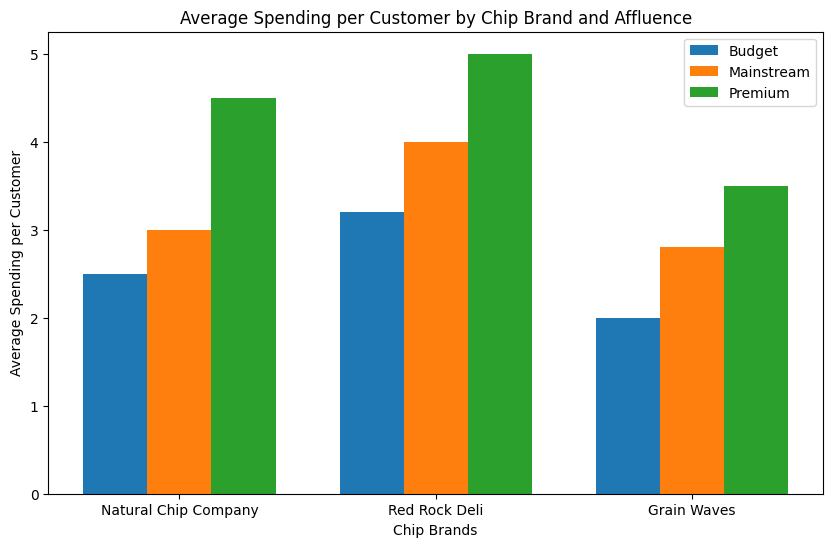

In [17]:

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.  You'll need to add a column for 'Chip Brand', 'Affluence', and 'Avg Spending'

# Sample data (replace with your actual data)
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Chip Brand': ['Natural Chip Company', 'Natural Chip Company', 'Natural Chip Company', 'Red Rock Deli', 'Red Rock Deli', 'Red Rock Deli', 'Grain Waves', 'Grain Waves', 'Grain Waves'],
    'Affluence': ['Budget', 'Mainstream', 'Premium', 'Budget', 'Mainstream', 'Premium', 'Budget', 'Mainstream', 'Premium'],
    'Avg Spending': [2.5, 3.0, 4.5, 3.2, 4.0, 5.0, 2.0, 2.8, 3.5]
}

df = pd.DataFrame(data)

# Create the grouped bar chart
bar_width = 0.25
index = range(len(df['Chip Brand'].unique()))

fig, ax = plt.subplots(figsize=(10, 6))

for i, affluence in enumerate(df['Affluence'].unique()):
  subset = df[df['Affluence'] == affluence]
  ax.bar([x + i * bar_width for x in index], subset['Avg Spending'], bar_width, label=affluence)

ax.set_xlabel('Chip Brands')
ax.set_ylabel('Average Spending per Customer')
ax.set_title('Average Spending per Customer by Chip Brand and Affluence')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(df['Chip Brand'].unique())
ax.legend()
plt.show()


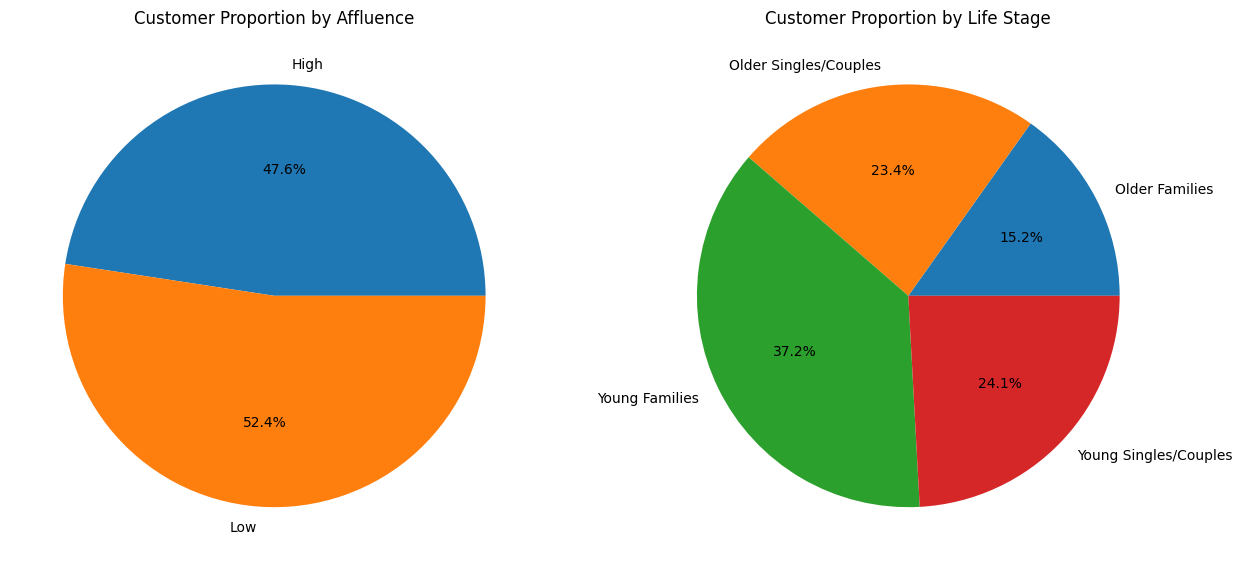

In [19]:

import matplotlib.pyplot as plt


data = {
    'Life Stage': ['Young Singles/Couples', 'Young Families', 'Older Singles/Couples', 'Older Families', 'Young Singles/Couples', 'Young Families', 'Older Singles/Couples', 'Older Families'],
    'Affluence': ['Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High'],
    'Customer Count': [100, 150, 80, 50, 75, 120, 90, 60]
}
df = pd.DataFrame(data)

# Group data for the pie chart
grouped_data = df.groupby(['Life Stage', 'Affluence'])['Customer Count'].sum().reset_index()


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart 1: Proportion of customers by affluence
affluence_counts = grouped_data.groupby('Affluence')['Customer Count'].sum()
affluence_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title='Customer Proportion by Affluence')
axes[0].set_ylabel('')  # Remove default label


# Pie chart 2: Proportion of customers by life stage
life_stage_counts = grouped_data.groupby('Life Stage')['Customer Count'].sum()
life_stage_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title='Customer Proportion by Life Stage')
axes[1].set_ylabel('')  # Remove default label

plt.show()


In [ ]:
. Mainstream Young Singles & Couples are the primary shopper of chips. Young and Older Families make up 26% of Chips shoppes and on average purchase larger baskets. There is more opportunity for sales with these shoppers.

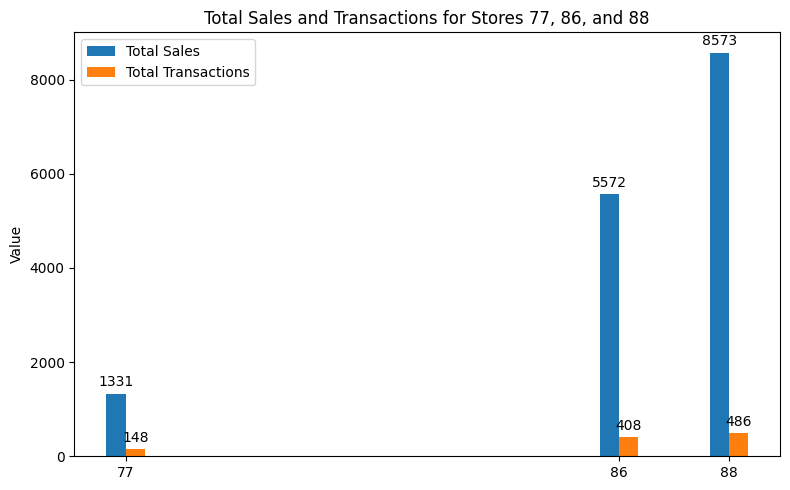

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the original data to avoid conflicts
original_data = pd.read_csv('/content/QVI_data (1).csv')  # Replace with the actual path to your data file

original_data['TOTAL_SALE'] = original_data['TOT_SALES'] * original_data['PROD_QTY']  # Recalculate TOTAL_SALE
original_data['DATE'] = pd.to_datetime(original_data['DATE']) # Convert 'DATE' to datetime

# Filter data for the specified stores and date range
store_data = original_data[(original_data['STORE_NBR'].isin([77, 86, 88])) &
                  (original_data['DATE'].dt.to_period('M') >= pd.Period('2019-02')) &
                  (original_data['DATE'].dt.to_period('M') <= pd.Period('2019-04'))]

# Calculate total sales and transactions for each store
store_metrics = store_data.groupby('STORE_NBR').agg(
    total_sales=('TOTAL_SALE', 'sum'),
    total_transactions=('TXN_ID', 'count')
).reset_index()

# --- Plotting the Combined Bar Chart ---
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))  # Adjust figure size if needed

x = store_metrics['STORE_NBR']  # Store numbers on the x-axis
rects1 = ax.bar(x - width/2, store_metrics['total_sales'], width, label='Total Sales')
rects2 = ax.bar(x + width/2, store_metrics['total_transactions'], width, label='Total Transactions')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Total Sales and Transactions for Stores 77, 86, and 88')
ax.set_xticks(x)
ax.set_xticklabels(x)  # Use store numbers as labels
ax.legend()

# Display the total transactions above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()